# Program `GEMTB`
## Programmed by Tokuro Fukui

In [9]:
#--------
# Module
#--------
## Public modules
import numpy as np
import mpmath as mp
import scipy as sp
from scipy.linalg import eig, eigh
from scipy import integrate
from scipy.special import roots_legendre
from scipy.interpolate import CubicSpline
from scipy.special import spherical_jn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams

from IPython.display import display, HTML # Disable output scrolling
display(HTML("<style>.scroll_box { height:200%  !important; }</style>"))

## Private modules
!wget -O physconst.py https://raw.githubusercontent.com/TokuroFukui/Lecture_Tsukuba2025/main/docs/assets/notebooks/4-5/physconst.py
!wget -O gem_nt.py https://raw.githubusercontent.com/TokuroFukui/Lecture_Tsukuba2025/main/docs/assets/notebooks/4-5/gem_nt.py
!wget -O g3rs.py https://raw.githubusercontent.com/TokuroFukui/Lecture_Tsukuba2025/main/docs/assets/notebooks/4-5/g3rs.py
!wget -O obep.py https://raw.githubusercontent.com/TokuroFukui/Lecture_Tsukuba2025/main/docs/assets/notebooks/4-5/obep.py
import g3rs, obep

--2025-02-27 04:50:42--  https://raw.githubusercontent.com/TokuroFukui/Lecture_Tsukuba2025/main/docs/assets/notebooks/4-5/physconst.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 452 [text/plain]
Saving to: ‘physconst.py’

physconst.py        100%[===================>]     452  --.-KB/s    in 0s      

2025-02-27 04:50:42 (23.9 MB/s) - ‘physconst.py’ saved [452/452]

--2025-02-27 04:50:42--  https://raw.githubusercontent.com/TokuroFukui/Lecture_Tsukuba2025/main/docs/assets/notebooks/4-5/gem_nt.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response.

In [10]:
#-----------------
# Input variables
#-----------------
## Interaction
# pot = "G3RS"
pot = "OBEP"

## GEM parameters
nbmx = 20  # Number of Gaussian basis functions
bmn = 0.5  # Minimum value of Gaussian range (fm)
bmx = 20.0 # Maximum value of Gaussian range (fm)
rho = (bmx / bmn)**(1 / (nbmx - 1))
idxmx = nbmx * 2

## Wave-function output and Fourier transform (coordinate space)
rmx = 30.0 # Maximum value of output (fm)
dr = 0.1   # Increments of output (fm)
irmx = int(rmx / dr) + 1
r_set = np.linspace(0, rmx, irmx)

## Wave-function output (momentum space)
kmx = 5.0 # Maximum value of output (fm^{-1})
dk = 0.02   # Increments of output (fm^{-1})
ikmx = int(kmx / dk) + 1
k_set = np.linspace(0, kmx, ikmx)

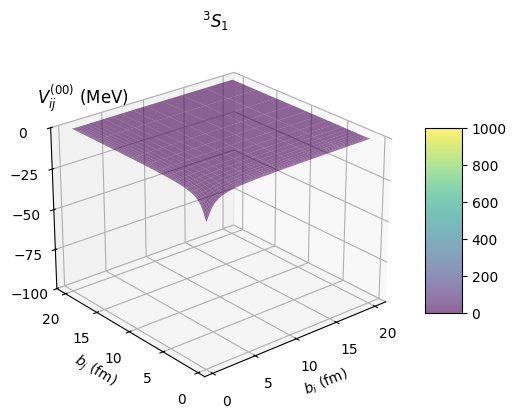

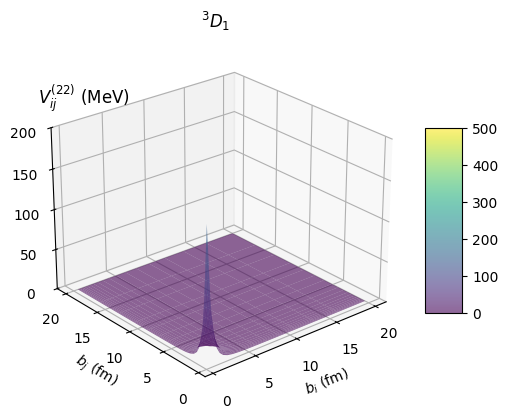

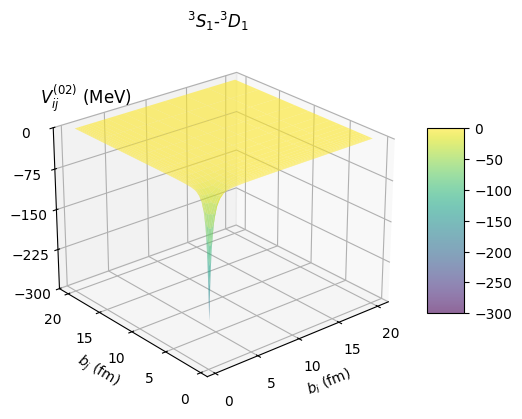

In [7]:
#----------------------------------
# ME calculations and visulaization
#----------------------------------
## G3RS
if pot == "G3RS":
    g3rs.plt_g3rs(irmx, rmx, dr)
    nu, Nfac, Nij, Hij, V00, V22, V02 = g3rs.me_g3rs(idxmx, nbmx, bmn, rho)

## OBEP
elif pot == "OBEP":
    nu, Nfac, Nij, Hij, V00, V22, V02 = obep.me_obep(idxmx, nbmx, bmn, rho)

## Visualization of matrix elements
b_series = [bmn * rho**i for i in range(nbmx)]
bi, bj = np.meshgrid(b_series, b_series)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(bi, bj, V00, cmap="viridis", alpha=0.6)
ax.set_xlabel("$b_i$ (fm)")
ax.set_ylabel("$b_j$ (fm)")
ax.zaxis.set_rotate_label(False)
fig.text(0.25, 0.75, "$V_{ij}^{(00)}$ (MeV)", ha='center', va='center', fontsize=12)
ax.set_xticks(np.arange(0.0, 21.0, 5.0))
ax.set_yticks(np.arange(0.0, 21.0, 5.0))
z_min = np.floor(np.min(V00) / 100) * 100
z_max = np.ceil(np.max(V00) / 100) * 100
ax.set_zlim(z_min, z_max)
ax.set_zticks(np.linspace(z_min, z_max, num=5))
rcParams['axes.labelpad'] = 3
ax.set_title("$^3S_1$")
ax.view_init(elev=25, azim=230)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
surf.set_clim(0.0, 1000.0)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(bi, bj, V22, cmap="viridis", alpha=0.6)
ax.set_xlabel("$b_i$ (fm)")
ax.set_ylabel("$b_j$ (fm)")
ax.zaxis.set_rotate_label(False)
fig.text(0.25, 0.75, "$V_{ij}^{(22)}$ (MeV)", ha='center', va='center', fontsize=12)
ax.set_xticks(np.arange(0.0, 21.0, 5.0))
ax.set_yticks(np.arange(0.0, 21.0, 5.0))
z_min = np.floor(np.min(V22) / 100) * 100
z_max = np.ceil(np.max(V22) / 100) * 100
ax.set_zlim(z_min, z_max)
ax.set_zticks(np.linspace(z_min, z_max, num=5))
rcParams['axes.labelpad'] = 3
ax.set_title("$^3D_1$")
ax.view_init(elev=25, azim=230)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
surf.set_clim(0.0, 500.0)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(bi, bj, V02, cmap="viridis", alpha=0.6)
ax.set_xlabel("$b_i$ (fm)")
ax.set_ylabel("$b_j$ (fm)")
ax.zaxis.set_rotate_label(False)
fig.text(0.25, 0.75, "$V_{ij}^{(02)}$ (MeV)", ha='center', va='center', fontsize=12)
ax.set_xticks(np.arange(0.0, 21.0, 5.0))
ax.set_yticks(np.arange(0.0, 21.0, 5.0))
z_min = np.floor(np.min(V02) / 100) * 100
z_max = np.ceil(np.max(V02) / 100) * 100
ax.set_zlim(z_min, z_max)
ax.set_zticks(np.linspace(z_min, z_max, num=5))
surf.set_clim(z_min, z_max)
rcParams['axes.labelpad'] = 3
ax.set_title("$^3S_1$-$^3D_1$")
ax.view_init(elev=25, azim=230)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
surf.set_clim(None, 0.0)
plt.show()

Ground-state energy
 -2.2241019129807276 (MeV)

Check for generalized eigenvalue problem
 [1.44173741e-12 2.69503665e-12 3.91084855e-13 5.89085293e-12
 7.30674899e-13 9.15043303e-12 1.13258405e-12 1.51540510e-11
 1.31786955e-12 2.86852425e-11 2.10191046e-12 3.53310967e-11
 3.52516828e-12 5.06630581e-11 2.68444056e-11 5.93472959e-12
 7.58563539e-11 1.01214488e-11 1.30702136e-10 1.83172769e-11
 1.33710161e-10 3.31191454e-11 2.22381659e-10 5.24213481e-11
 3.97253454e-10 8.62236658e-11 2.99034117e-10 1.24259010e-10
 7.31939022e-10 2.27618499e-10 1.00320190e-09 5.07318943e-10
 1.28425293e-09 4.97419294e-10 1.65115497e-09 5.61399133e-10
 2.08731291e-09 8.94287477e-10 2.72162958e-09 7.23540937e-10]

Probability 
 P(S) =  0.9464758644128857 
 P(D) =  0.05352413558711389 
 P(S) + P(D) =  0.9999999999999996



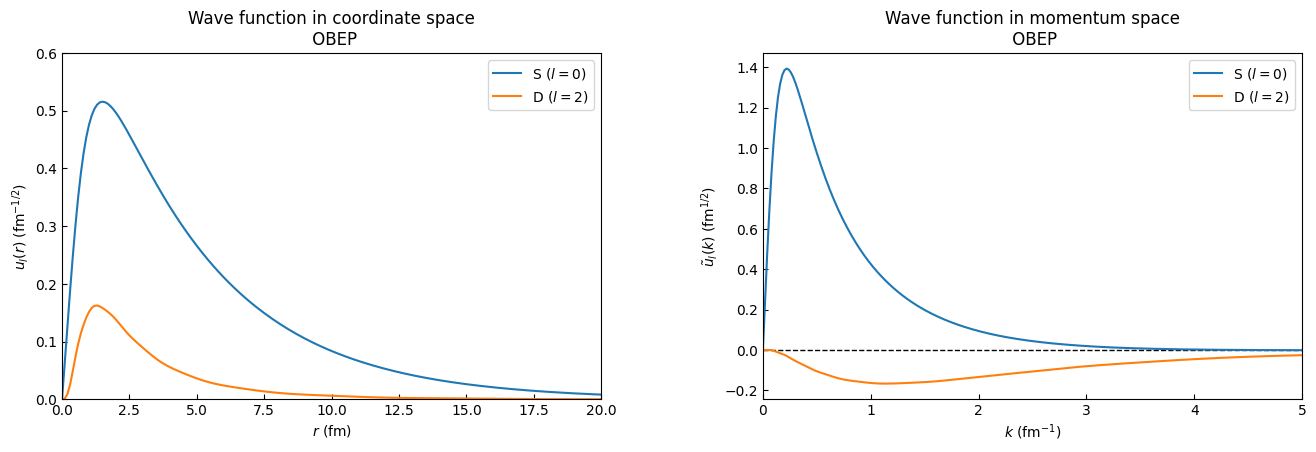

In [8]:
#--------------------------------
# Generalized eigenvalue problem
#--------------------------------
## Diagonalization
eval, evec = eigh(Hij, Nij)
print("Ground-state energy\n", eval[0], "(MeV)")
# print('\nEivenvector: \n', evec[0])

## Check for generalized eigenvalue problem
def eig_check(A, B, eigval, eigvec):
    return np.linalg.norm(A.dot(eigvec) - eigval * B.dot(eigvec))

def eig_checks(A, B, eigval, eigvec):
    r = np.zeros(eigval.shape[0])
    i = 0
    for e, v in zip(eigval, eigvec.T):
        r[i] = eig_check(A, B, e, v)
        i += 1
    return r

print("\nCheck for generalized eigenvalue problem\n", eig_checks(Hij, Nij, eval, evec))

## Normalization
Anorm = np.zeros(2)
l_num = -1
for l in range(0, 3, 2):
    l_num += 1
    for i in range(nbmx):
        for j in range(nbmx):
            idx = int(i + nbmx * l / 2)
            jdx = int(j + nbmx * l / 2)
            Anorm[l_num] += evec[idx, 0] * evec[jdx, 0] * Nij[idx, jdx]

Anorm[:] = 1.0 / np.sqrt(Anorm[:])
spro = 1.0 / Anorm[0]**2
dpro = 1.0 / Anorm[1]**2
print("\nProbability", "\n P(S) = ", spro, "\n P(D) = ", dpro, "\n P(S) + P(D) = ", spro + dpro)

## Wave function in coordinate space
wf = np.zeros((irmx, 2))
for ir in range(irmx):
    r = ir * dr

    for idx in range(idxmx):
        l = int(idx / nbmx) * 2
        i = int(idx - nbmx * l / 2)
        l_num = int(l / 2)

        phi = r**(l + 1) * np.exp(-nu[idx] * r**2)
        wf[ir, l_num] += evec[idx, 0] * Nfac[idx] * phi

## Wave function in momentum space
wfmom = np.zeros((ikmx, 2))
sumk0 = 0.0
for ik in range(ikmx):
    k = ik * dk

    for idx in range(idxmx):
        l = int(idx / nbmx) * 2
        i = int(idx - nbmx * l / 2)
        l_num = int(l / 2)

        phimom = k**(l + 1) * np.exp(-0.25 * k**2 / nu[idx])
        wfmom[ik, l_num] += (-1.0)**l_num * 1.0 / (2.0 * nu[idx])**(l + 1.5) * evec[idx, 0] * Nfac[idx] * phimom

print()
plt.figure(figsize=(16, 4.5))
plt.subplot(1, 2, 1)
plt.xlim([0.0, 20.0])
plt.ylim([0.0, 0.6])
plt.plot(r_set, abs(wf[:, 0]), label="S ($l=0$)")
plt.plot(r_set, abs(wf[:, 1]), label="D ($l=2$)")
plt.xlabel("$r$ (fm)")
plt.ylabel("$u_{l}(r)$ (fm$^{-1/2}$)")
plt.tick_params(axis='both', direction='in')
plt.title("Wave function in coordinate space\n OBEP")
plt.legend()
plt.subplots_adjust(wspace=0.3)

plt.subplot(1, 2, 2)
plt.xlim([0.0, kmx])
# plt.ylim([None, None])
plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
plt.plot(k_set, -wfmom[:, 0], label="S ($l=0$)")
plt.plot(k_set, -wfmom[:, 1], label="D ($l=2$)")
plt.xlabel("$k$ (fm$^{-1}$)")
plt.ylabel("$\\tilde u_{l}(k)$ (fm$^{1/2}$)")
plt.tick_params(axis='both', direction='in')
plt.title("Wave function in momentum space\n OBEP")
plt.legend()

plt.show()

# History
## Ver. 00a00 (9/July/2024)
1. First version released.
1. Deuteon (S-wave only) was computed with a central Yukawa potential.

## Ver. 00a01 (9/July/2024)
1. A bug related to the preparation of the Gaussian range parameters was fixed.

## Ver. 00a02 (15/July/2024)
1. Computation of the matrix elements is now more efficient owing to their symmetry.

## Ver. 00b00 (16/July/2024)
1. S-D coupling cased by the tensor interaction was implemented using the G3RS potential.

## Ver. 00b01 (16/July/2024)
1. A bug related to the normalization was fixed.

## Ver. 00b02 (18/July/2024)
1. Two-body matrix elements are now visualized.
2. An error on the formalism of the two-body matrix elements was fixed.

## Ver. 00b03 (23/July/2024)
1. The quadrupole moment was computed.
2. An error on the wave-function output was fixed.

## Ver. 00b04 (18/October/2024)
1. The momemtum distribution was computed.

## Ver. 01a00 (4/February/2025)
1. The code was decomposed into some modules.

## Ver. 01b00 (4/February/2025)
1. The Bonn OBEP (Bonn-OBEPR-A) was partially implemented.<br>
   `pot = "G3RS"`: G3RS potential<br>
   `pot = "Bonn"`: Bonn-OBEPR-A

## Ver. 01b01 (13/February/2025)
1. A bug in the radial integration relevant for the Bonn-OBEP calculations was fixed.<br>

## Ver. 01c00 (14/February/2025)
1. A different scheme of the regularization was implemented.<br>
2. The pseudo-scalar-meson exchange was implemented.<br>

## Ver. 01c01 (17/February/2025)
1. A different scheme of the radial integration was implemented.<br>

## Ver. 01d00 (20/February/2025)
1. A modification implemented in the versino `01c01` was canceled
due to a numerical instability.
2. The vector-meson exchange without velocity-dependet terms was implemented.<br>

## Ver. 01d01 (27/February/2025)
1. The velocity-dependet terms of the vector-meson exchange were implemented.<br>
2. The scalar-meson exchange was implemented.<br>
3. The module "bonn.py" was renamed to "obep.py".<br>
   `pot = "G3RS"` or `"OBEP"`